# <center> Concevez une application au service de la santé publique <center>

## <center> Notebook de l'Exploration </center>

## Table des matières <a id="table">

**- 1 - Chargement des librairies et le jeu de données**


    
**- 2 - L'analyse exploratoire des données (AED)**
       
      - 2.1 - Analyse univariée des variables catégorielles
      - 2.2 - Analyse univariée des variables numériques 
              - Statistique descriptive
              - Distribution des variables 
 
      - 2.3 - Analyse bivariée 
               - Des variables numérique vs. variables catégorielle
               - Des variables numériques 
               - Matrix de corrélations
      - 2.4 - Analyse explicative : Test d'ANOVA pour la relation entre les variables numériques et catégorielle
      - 2.5 - Analyse multivariée avec ACP (Analyse des composantes principales)
      
**- 3 - Implementation de l'application Keto_score**

       - 3.1 - Création de keto_score 
       - 3.2 - Création de keto_grade avec le "5-point likert scale"
        
**- 4 - Conclusion**

**- 5 - Ouverture** 

## 1- Chargement des librairies et le jeu de données

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
from pandas.api.types import is_numeric_dtype

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp
import math

import time
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.patches import Circle
import missingno as msno
from re import search
from plotnine import ggplot,aes, geom_line, geom_density


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Exporter le jeud de donné de l'applicatio keto_score
appli_final = pd.read_csv(r"C:\Users\faeze\Documents\OC data science\PROJECT\Projet3\appli_final.csv", index_col=[0])

In [3]:
appli_final.head(3)

,product_name,nutriscore_grade,proteins_100g,fat_100g,sugars_100g,energy_kcal_100g,code,countries_en,carbohydrates_100g,nutriscore_score,main_category_en,brands,saturated_fat_100g
0,Vegan Almond Ice Cream 3 x,d,2.0,16.0,19.00,248.00,8714100658499,"Australia,France,Germany,Spain,United Kingdom",23.00,15.0,Ice creams,Magnum,9.80
1,Crunchy peanut butter,d,25.0,50.0,6.25,593.75,11110791559,United States,21.88,13.0,Peanut butters,Simple Truth Organic,7.81
2,Cheese Tomato & Basil,d,10.0,22.0,5.00,474.00,7300400127387,"France,Germany,Poland,Switzerland",56.50,15.0,Crispbreads,"Wasa,Wasa Sandwich",8.50


## 2 - L'analyse exploratoire des données (AED)


### 2.1 - Analyse univariée des variables catégorielles

In [4]:
# Convertir les colonne des de minuscules à majuscules
appli_final['product_name']= appli_final['product_name'].str.upper()
appli_final['main_category_en']= appli_final['main_category_en'].str.upper()
appli_final['brands']=appli_final['brands'].str.upper()
appli_final['countries_en']=appli_final['countries_en'].str.upper()
appli_final['nutriscore_grade']=appli_final['nutriscore_grade'].str.upper()

In [5]:
# la fréquention des produits, brand, catégrie et pays 
print("Le produits le plus fréquent est :", appli_final['product_name'].value_counts().idxmax())
print("Le brand le plus fréquent est : ",appli_final['brands'].value_counts().idxmax())
print("La catégorie la plus fréquente est :", appli_final['main_category_en'].value_counts().idxmax())
print("Le pays la plus fréquent est :", appli_final['countries_en'].value_counts().idxmax())


Le produits le plus fréquent est : ICE CREAM
Le brand le plus fréquent est :  CARREFOUR
La catégorie la plus fréquente est : SNACKS
Le pays la plus fréquent est : FRANCE


<Figure size 720x576 with 0 Axes>

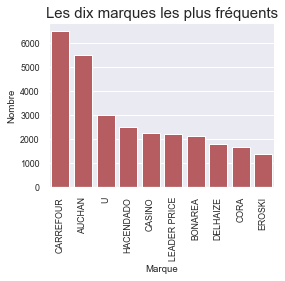

In [6]:
# Visualiesr les 10 brands les plus fréquents 

b = Counter(appli_final['brands']).most_common(10)
brands = pd.DataFrame(b, columns=['Marque', 'Nombre'])


sns.set(font_scale = 0.8)
plt.figure(figsize=(10,8))
#sns.barplot(x=brands["Marque"], y=brands["Nombre"], color = 'r')

sns.catplot(x="Marque", y = "Nombre" , data= brands,
                height=4, aspect=1, color = 'r', kind = 'bar')
#plt.xlabel('Nom de Marque', fontsize=10)
#plt.ylabel('Nombre', fontsize=10)
plt.title("Les dix marques les plus fréquents", fontsize=15)
plt.xticks(rotation= 90)
plt.tight_layout()

plt.savefig("brands", orientation='portrait',bbox_inches='tight')    

<Figure size 720x576 with 0 Axes>

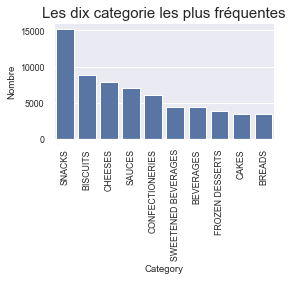

In [7]:
# Visualiesr les 10 catégories les plus fréquentes 

categ = Counter(appli_final['main_category_en']).most_common(10)
categorie = pd.DataFrame(categ, columns=['Category', 'Nombre'])


sns.set(font_scale = 0.8)
plt.figure(figsize=(10,8))
#sns.barplot(x=categorie["Category"], y=categorie["Nombre"], color = 'b')

sns.catplot(x="Category", y = "Nombre" , data= categorie,
                height=4, aspect=1, color = 'b', kind = 'bar')

#plt.xlabel('Nom de categorie', fontsize=10)
#plt.ylabel('Nombre', fontsize=10)
plt.title("Les dix categorie les plus fréquentes", fontsize=15)
plt.xticks(rotation= 90)

plt.tight_layout()
plt.savefig("category", orientation='portrait',bbox_inches='tight')    


<Figure size 720x576 with 0 Axes>

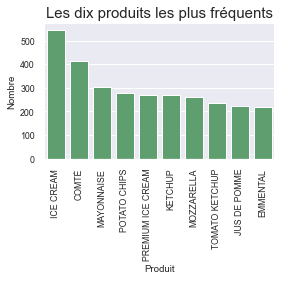

In [8]:
# Visualiesr les 10 produits les plus fréquents 

prod = Counter(appli_final['product_name']).most_common(10)
produit = pd.DataFrame(prod, columns=['Produit', 'Nombre'])


#sns.set(font_scale = 0.8)
plt.figure(figsize=(10,8))
#sns.barplot(x=produit["Produit"], y=produit["Nombre"], color= 'g')
sns.catplot(x="Produit", y = "Nombre" , data= produit,
                height=4, aspect=1, color = 'g', kind = 'bar')

plt.title("Les dix produits les plus fréquents", fontsize=15)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.savefig("product", orientation='portrait',bbox_inches='tight')    


<Figure size 720x576 with 0 Axes>

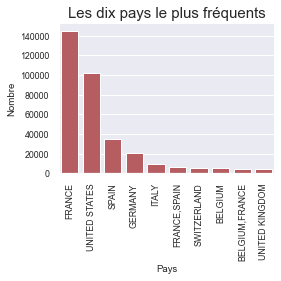

In [9]:
# Visualiesr les 10 PAYS les plus fréquents 

p = Counter(appli_final['countries_en']).most_common(10)
pays = pd.DataFrame(p, columns=['Pays', 'Nombre'])


sns.set(font_scale = 0.8)
plt.figure(figsize=(10,8))
#sns.barplot(x=pays["Pays"], y=pays["Nombre"])
sns.catplot(x="Pays", y = "Nombre" , data= pays,
                height=4, aspect=1, color = 'r', kind = 'bar')
#plt.xlabel('Nom de pays', fontsize=10)
#plt.ylabel('Nombre', fontsize=10)
plt.title("Les dix pays le plus fréquents", fontsize=15)
plt.xticks(rotation= 90)
plt.tight_layout()


plt.savefig("pays", orientation='portrait',bbox_inches='tight')    

<Figure size 720x576 with 0 Axes>

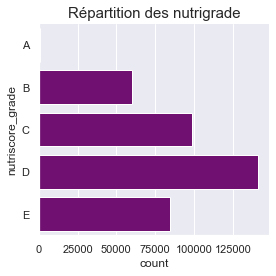

In [10]:
# Visualiser la répartition de nutris_grade
sns.set(font_scale = 1)

plt.figure(figsize=(10,8))

g = sns.catplot(y="nutriscore_grade", data=appli_final.sort_values(by = "nutriscore_grade")
                , kind="count",
                height=4, aspect=1, color = 'purple', orient= "h")
#plt.xlabel('Nutri_grade', fontsize=10)
#plt.ylabel('Nombre', fontsize=10)
plt.title("Répartition des nutrigrade", fontsize=15)
plt.tight_layout()
plt.savefig("nutri_grade", orientation='portrait',bbox_inches='tight')    

- Le jeu de donnée ne contient pas beaucoup de produits avec le nutri_grade de "A"
- Les produits avec le nutri_grade "D" sont plus nombreux dans le jeu de données

### 2.2 Analyse univariée des variables numériques
###### - Statistique descriptive
 

In [11]:
# Statistique descriptives 
appli_final.describe()

,proteins_100g,fat_100g,sugars_100g,energy_kcal_100g,carbohydrates_100g,nutriscore_score,saturated_fat_100g
count,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000
mean,8.409117,15.907693,15.087733,292.731796,29.245101,11.418190,6.127743
std,8.872043,17.107706,19.712660,182.048066,27.528872,7.580466,8.117164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900000,1.990000,0.900000,134.000000,4.170000,4.000000,0.300000
50%,6.000000,11.000000,5.000000,284.000000,18.750000,12.000000,2.900000
75%,11.900000,25.000000,24.140000,429.000000,53.600000,17.000000,9.000000
max,100.000000,100.000000,100.000000,846.000000,100.000000,40.000000,100.000000


### Bilan sur la statistique descriptive

- L'écart-type le plus important est sur les variable "energy" et "carbohydrates" , 
- La moyenne du nutriscore est environs 11.4

##### - Distribution des variables

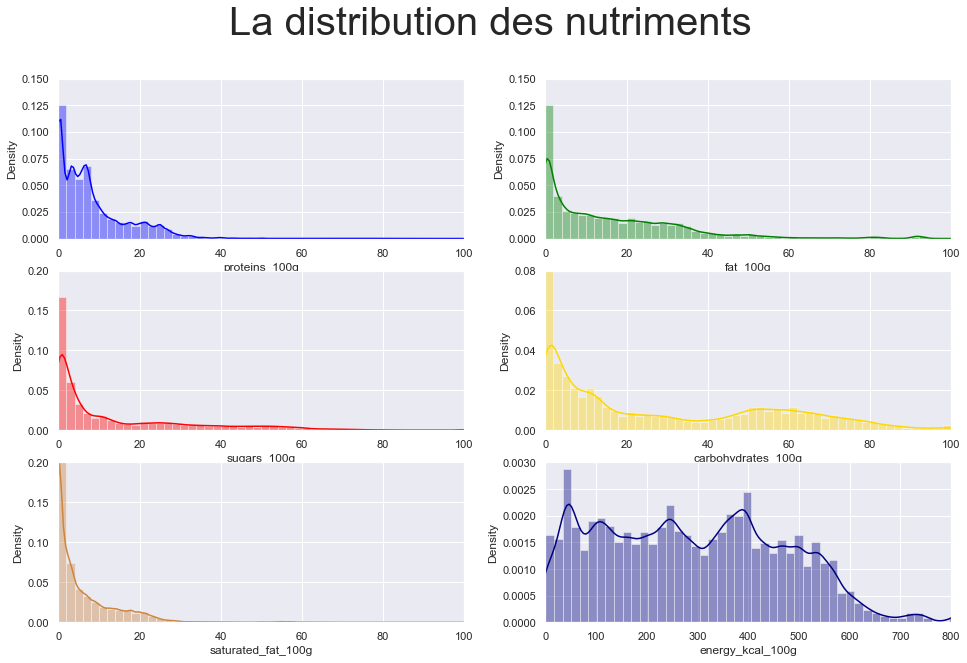

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
sns.set(font_scale = 1)
fig.suptitle("La distribution des nutriments", fontsize = 40)

proteins_plot = sns.distplot(appli_final['proteins_100g'], color="blue", ax=axes[0,0], kde=True)
proteins_plot.set_ylim(top=0.15)
proteins_plot.set_xlim(left=0,right=100)


fat_plot = sns.distplot(appli_final['fat_100g'], color="green", ax=axes[0,1], kde=True)
fat_plot.set_ylim(top=0.15)
fat_plot.set_xlim(left=0,right=100)

sugars_plot = sns.distplot(appli_final['sugars_100g'], color="red",ax=axes[1,0], kde=True)
sugars_plot.set_ylim(top=0.2)
sugars_plot.set_xlim(left=0,right=100)

carbohydrates_plot = sns.distplot(appli_final['carbohydrates_100g'], color="gold",ax=axes[1,1], kde=True)
carbohydrates_plot.set_ylim(top=0.08)
carbohydrates_plot.set_xlim(left=0,right=100)

saturated_fat_plot = sns.distplot(appli_final['saturated_fat_100g'], color="peru",ax=axes[2,0], kde=True)
saturated_fat_plot.set_ylim(top=0.2)
saturated_fat_plot.set_xlim(left=0,right=100)

energy_plot = sns.distplot(appli_final['energy_kcal_100g'], color="navy",ax=axes[2,1], kde=True)
energy_plot.set_ylim(top=0.003)
energy_plot.set_xlim(left=0,right=800)



plt.savefig('distribution_nutriments.png',orientation='portrait', bbox_inches='tight')    

In [13]:
print("protéine :", appli_final['proteins_100g'].skew())
print("fat :", appli_final['fat_100g'].skew())
print("sugars :", appli_final['sugars_100g'].skew())
print("carbohydrates :", appli_final["carbohydrates_100g"].skew())
print("saturated_fat :", appli_final['saturated_fat_100g'].skew())
print("energy_kcal :", appli_final["energy_kcal_100g"].skew())

protéine : 2.093190877040481
fat : 1.638938653316331
sugars : 1.5741328485137882
carbohydrates : 0.6097458937929047
saturated_fat : 2.552045750357446
energy_kcal : 0.3046305113628893


<Figure size 576x360 with 0 Axes>

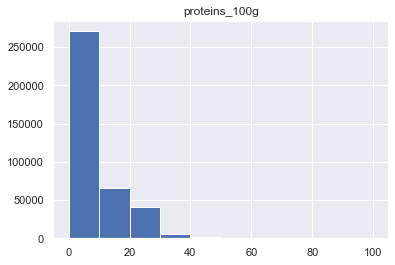

<Figure size 576x360 with 0 Axes>

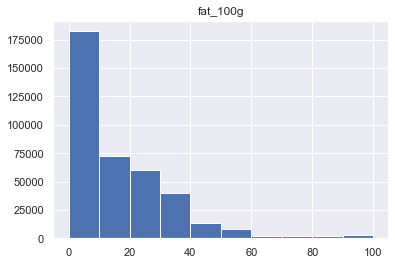

<Figure size 576x360 with 0 Axes>

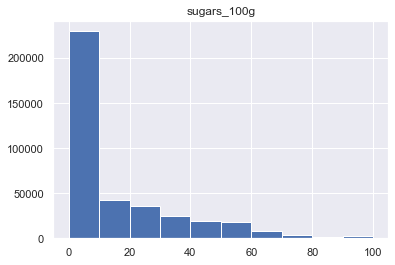

<Figure size 576x360 with 0 Axes>

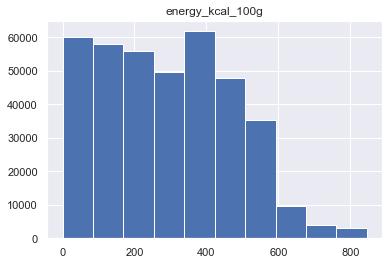

<Figure size 576x360 with 0 Axes>

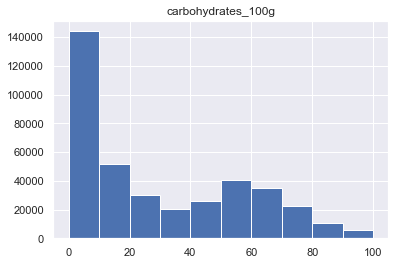

<Figure size 576x360 with 0 Axes>

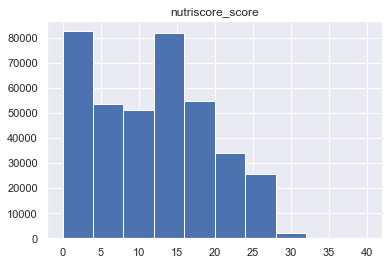

<Figure size 576x360 with 0 Axes>

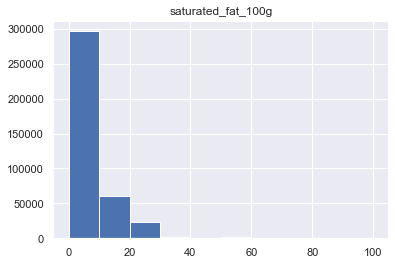

In [14]:
for column in appli_final.loc[:, appli_final.dtypes == np.number].columns.tolist() :
    sns.set(font_scale = 1)
    plt.figure(figsize=(8,5))
    plt.figure(column)
    plt.title(column)
    appli_final[column].hist()

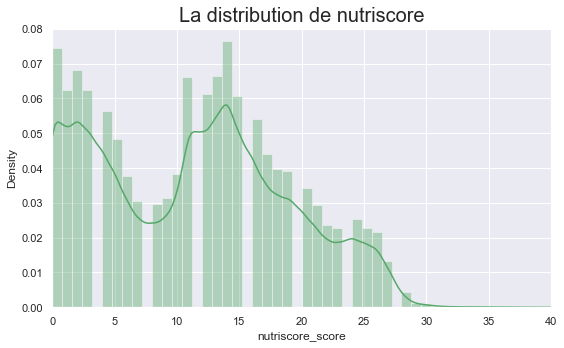

In [15]:
sns.set(font_scale = 1)
plt.figure(figsize=(8,5))

ax=sns.distplot(appli_final['nutriscore_score'], color="g")
ax.set_title("La distribution de nutriscore", fontsize = 20)
ax.set_xlim(left = 0, right = 40)
plt.tight_layout()


plt.savefig('dist_nutriscore.png', orientation='portrait',bbox_inches='tight')    

In [16]:
print(appli_final['nutriscore_score'].skew())
print(appli_final['nutriscore_score'].mean())

0.19332306904362312
11.418190492983312


- Le jeu de donnée ne contient pas des produit avec le nutriscore inférieur à 0 

<Figure size 576x360 with 0 Axes>

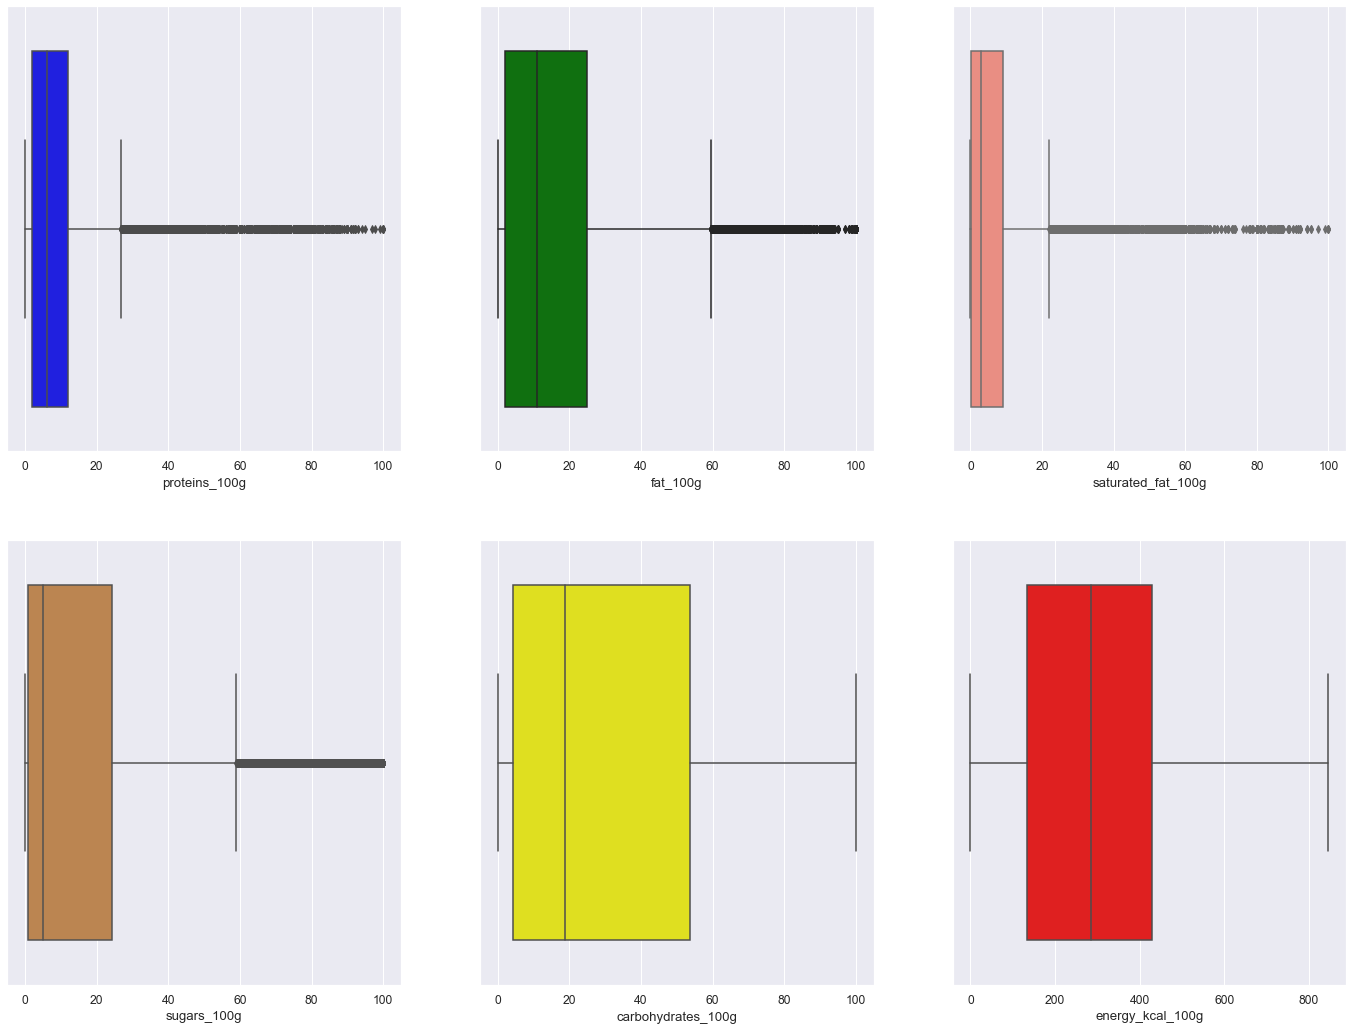

In [17]:
# Boit à moustache pour  chaque variable

sns.set(font_scale = 1.1)

plt.figure(figsize=(8,5))
fig, axes = plt.subplots(2, 3, figsize=(24, 18))

proteins_boxplot = sns.boxplot(appli_final['proteins_100g'], color="blue", ax=axes[0,0])
#proteins_boxplot.set_ylim(top=20000)
#proteins_plot.set_xlim(left=0,right=100)


fat_boxplot = sns.boxplot(appli_final['fat_100g'], color="green", ax=axes[0,1])
#fat_boxplot.set_ylim(top=50000)
#fat_plot.set_xlim(left=0,right=80)


sugars_boxplot = sns.boxplot(appli_final['sugars_100g'], color="peru",ax=axes[1,0])
#sugars_boxplot.set_ylim(top=50000)
#sugars_plot.set_xlim(left=0,right=2)


carbohydrates_boxplot = sns.boxplot(appli_final['carbohydrates_100g'], color="yellow",ax=axes[1,1])
#carbohydrates_boxplot.set_ylim(top=50000)
#carbohydrates_plot.set_xlim(left=0,right=40)


saturated_fat_boxplot = sns.boxplot(appli_final['saturated_fat_100g'], color="salmon",ax=axes[0,2])
#saturated_fat_boxplot.set_ylim(top=10000)
#saturated_fat_plot.set_xlim(left=0,right=40)

energy_boxplot = sns.boxplot(appli_final['energy_kcal_100g'], color="red", ax= axes[1,2])
#energy_boxplot.set_ylim(top=40000)
#energy_boxplot.set_xlim(left=0,right=400) 


plt.savefig('boxplot_nutriments.png', orientation='portrait',bbox_inches='tight')    

## 2.3 - Analyse bivariée 
#####  Des variables numérique vs. variables catégorielle

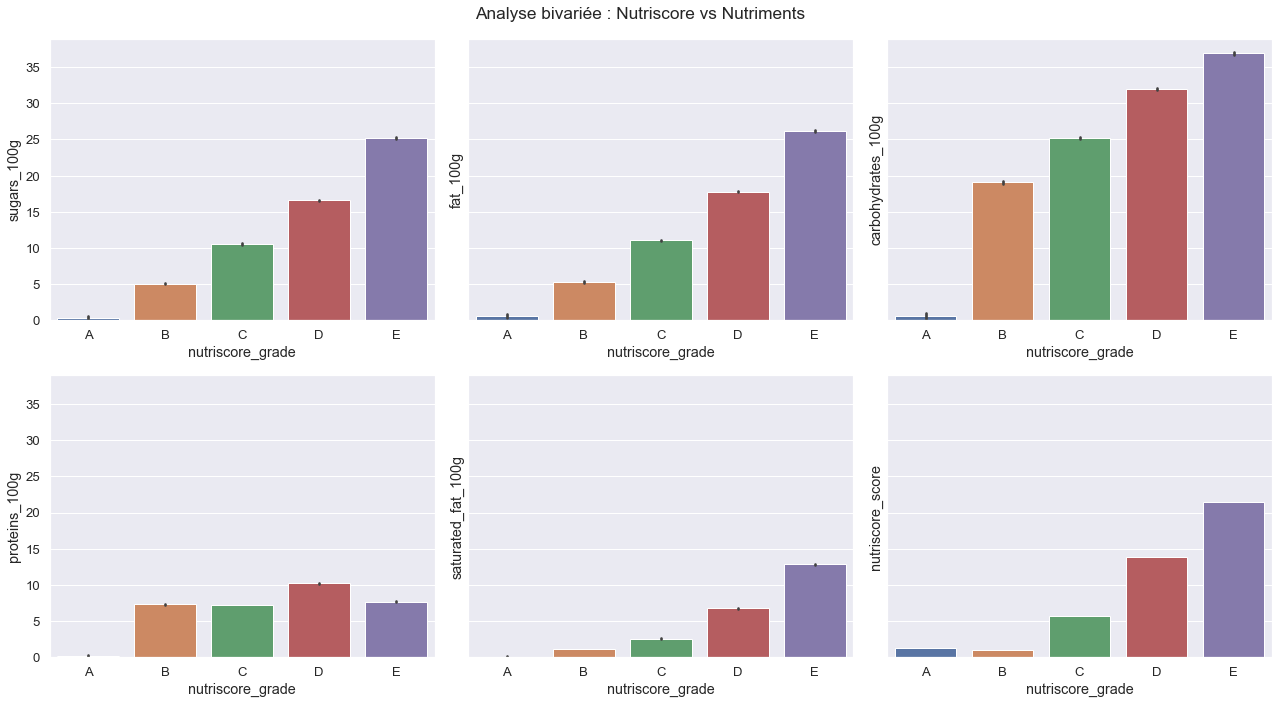

In [18]:
sns.set(font_scale = 1.2)
grade_sorted = appli_final.sort_values(by = 'nutriscore_grade')

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

fig.suptitle("Analyse bivariée : Nutriscore vs Nutriments")

sns.barplot(ax=axes[0, 0], data=grade_sorted, x='nutriscore_grade', y='sugars_100g')
sns.barplot(ax=axes[0, 1], data=grade_sorted, x='nutriscore_grade', y='fat_100g')
sns.barplot(ax=axes[0, 2], data=grade_sorted, x='nutriscore_grade', y='carbohydrates_100g')
sns.barplot(ax=axes[1, 0], data=grade_sorted, x='nutriscore_grade', y='proteins_100g')
sns.barplot(ax=axes[1, 1], data=grade_sorted, x='nutriscore_grade', y='saturated_fat_100g')
sns.barplot(ax=axes[1, 2], data=pd.DataFrame(grade_sorted.groupby('nutriscore_grade')['nutriscore_score'].mean()).reset_index(),
          x='nutriscore_grade', y='nutriscore_score')
plt.tight_layout()
plt.savefig('bivariee1.png')    

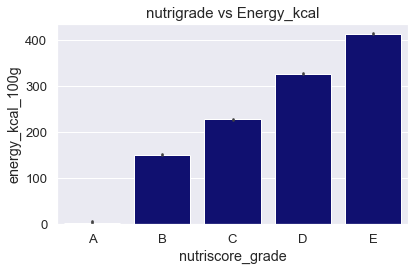

In [19]:
sns.barplot(data=grade_sorted, x='nutriscore_grade', y='energy_kcal_100g', color = 'navy')
plt.title("nutrigrade vs Energy_kcal", fontsize=15)
plt.tight_layout()
plt.savefig('energy_grade.png')

##### Des variables numérique vs. variables numériques

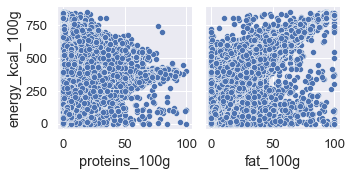

In [20]:
# La distribution de sucre et fat vs energy

sns.pairplot(
appli_final,
x_vars=["proteins_100g", "fat_100g"],
y_vars=["energy_kcal_100g"], diag_kind="bar")


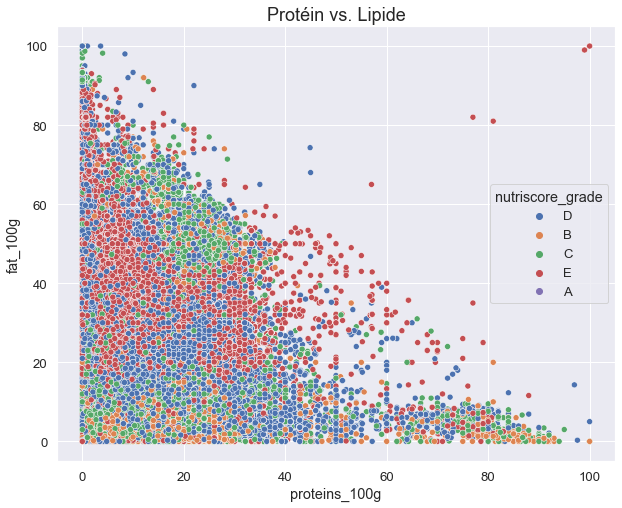

In [21]:
# Analyse bivariée : Suger Vs. Proteins
plt.figure(figsize=(10,8))
sns.scatterplot(data= appli_final, x="proteins_100g", y="fat_100g", hue="nutriscore_grade")
plt.title("Protéin vs. Lipide", fontsize=18)


plt.savefig('protein_lipide.png', orientation='portrait',bbox_inches='tight')

  -  Les produits riches en lipide sont souvent les produit pauvre en protéine
  -  Il y a peu de produits avec le nutri_grade "E" qui sont riche en protéine et lipide 

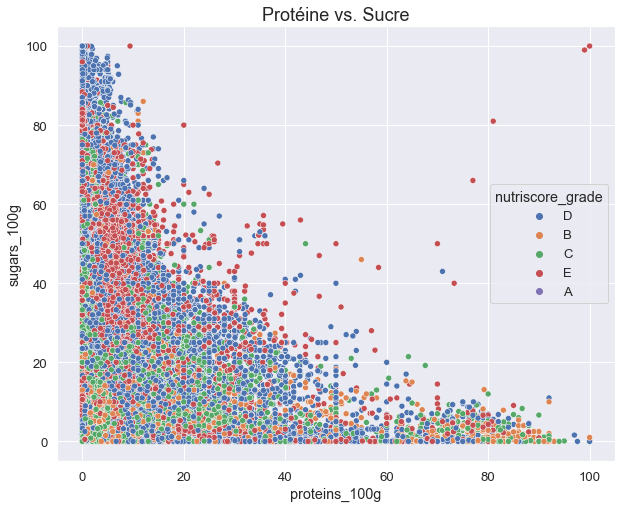

In [22]:
# Analyse bivariée : Suger Vs. Proteins
plt.figure(figsize=(10,8))
sns.scatterplot(data= appli_final, x="proteins_100g", y="sugars_100g", hue="nutriscore_grade")
plt.title("Protéine vs. Sucre", fontsize=18)

plt.savefig('boxplot_sucre.png', orientation='portrait',bbox_inches='tight')

- Les produits riches en protéine et en sucre, ont souvent le nutris_grade de "E"
- Les produits avec le nutri_grade de "B" et "C" sont les produits riche en protéine et pauvre en sucre


<Figure size 1152x432 with 0 Axes>

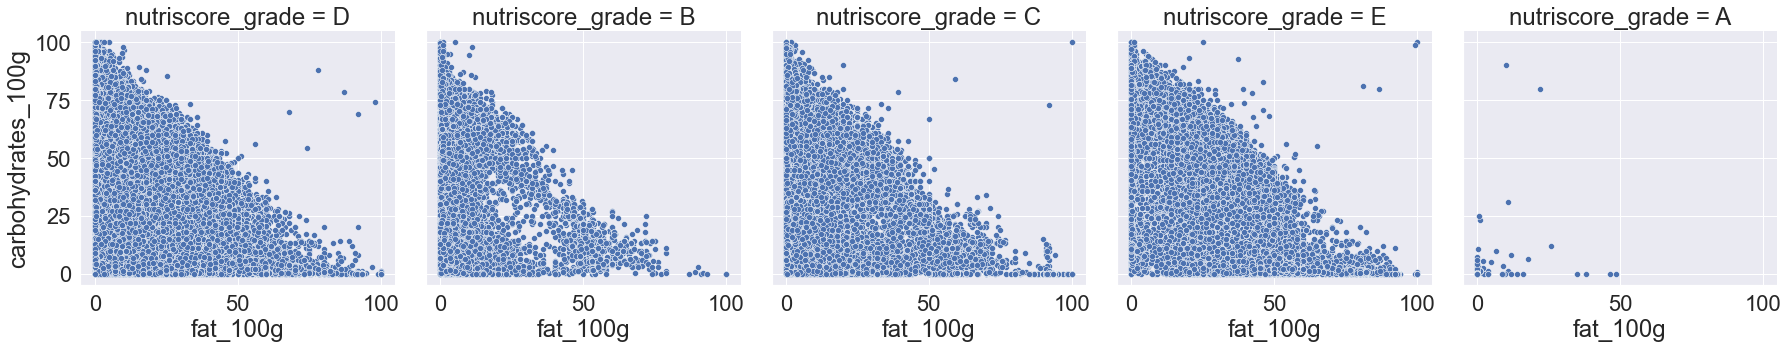

In [23]:
# les différents nutriments(en 100g) vs. nutriscore

sns.set(font_scale=2) 

plt.figure(figsize=(16, 6))
sns.relplot(
    data =appli_final,x="fat_100g", y="carbohydrates_100g",
    col="nutriscore_grade",
    kind="scatter"
)

plt.savefig('fat_carbohydrat_nutrigrade.png', orientation='portrait',bbox_inches='tight')

<Figure size 1152x432 with 0 Axes>

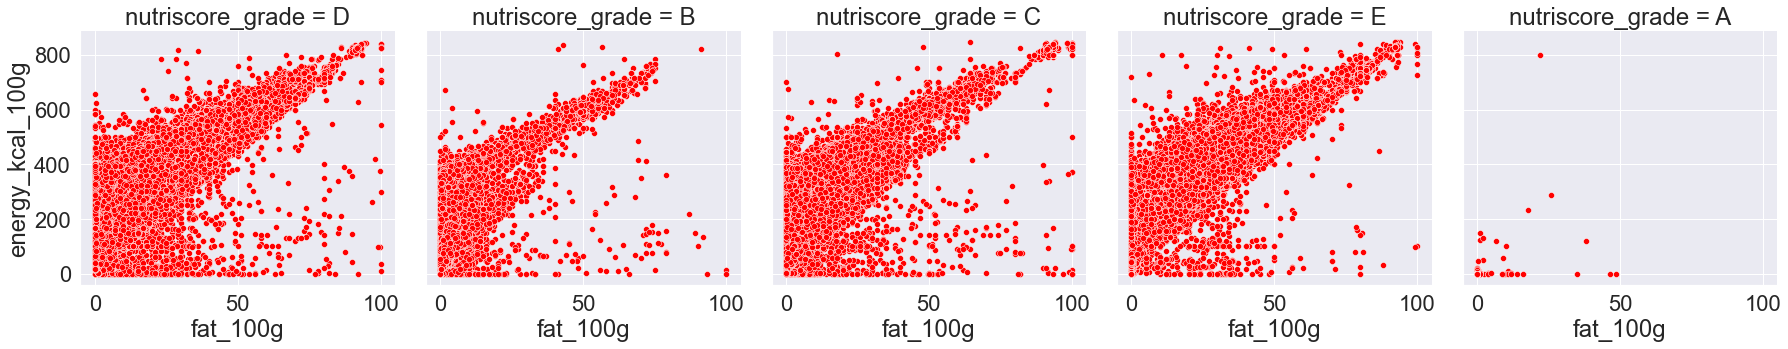

In [24]:
# Fat vS energy
sns.set(font_scale=2) 

plt.figure(figsize=(16, 6))
sns.relplot(
    data =appli_final,x="fat_100g", y="energy_kcal_100g",
    col="nutriscore_grade",
    kind="scatter", color = 'red'
)

plt.savefig('energy_fat_nutrigrade.png', orientation='portrait',bbox_inches='tight')    

- Les produits de trois group de nutri_grade "e" , "d", "c" et "b" qui sont riches en lipides sont souvent les produits caloriques.
- Parmis les produit avec le group "a" de nutri_grad, il y en a qui sont riche en lipide mais pas très caloriques. 

<Figure size 1152x432 with 0 Axes>

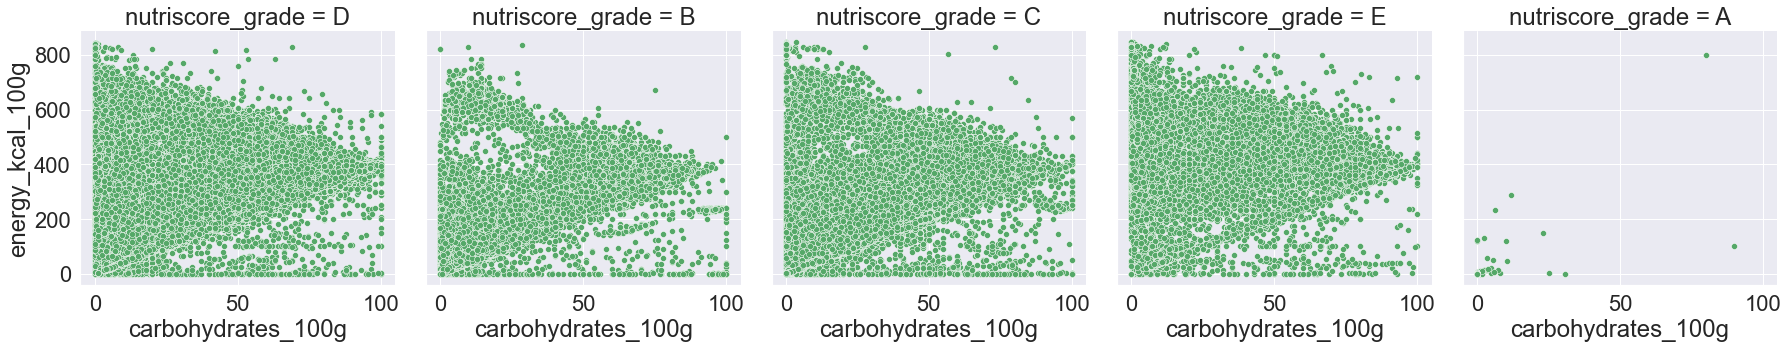

In [25]:
# Carbohydrate vs Energy
sns.set(font_scale=2) 

plt.figure(figsize=(16, 6))
sns.relplot(
    data =appli_final,x="carbohydrates_100g", y="energy_kcal_100g",
    col="nutriscore_grade",
    kind="scatter", color = 'g'
)

<Figure size 1152x432 with 0 Axes>

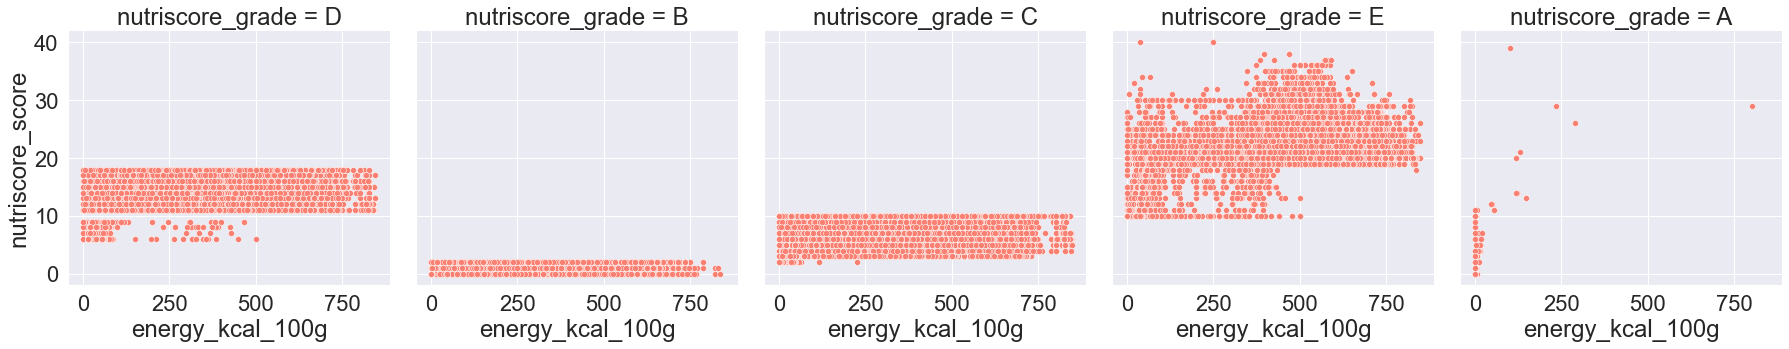

In [26]:
# Nutri_score vs energy

sns.set(font_scale=2) 

plt.figure(figsize=(16, 6))
sns.relplot(
    data =appli_final,x="energy_kcal_100g", y="nutriscore_score",
    col="nutriscore_grade",
    kind="scatter", color = 'salmon'
)

##### Analyse bivariée (Coéficient de "Pearson")

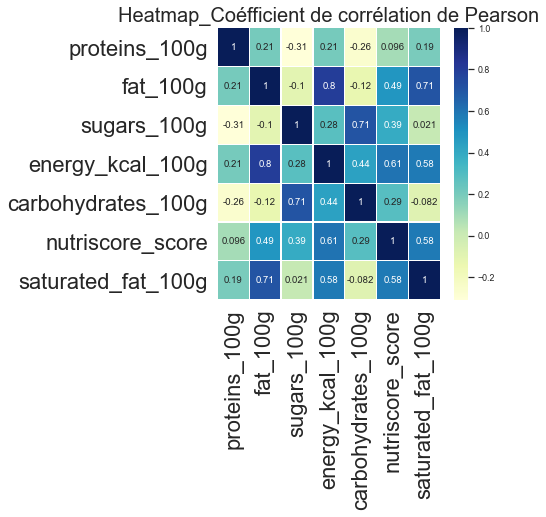

In [27]:
# Matrix de la correlation entre les variables 
f, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=0.8) 
ax = sns.heatmap(appli_final.corr(), annot = True , linewidths=.2, cmap="YlGnBu")
plt.title('Heatmap_Coéfficient de corrélation de Pearson', size = 20)

plt.savefig('correlation.png', orientation='portrait',bbox_inches='tight')

####  Bilan sur l'analyse bivariée
- Les produit riche en lipides sont les produits les plus caloriques. Pour cetains produits avec le nutri_grade de "d", "c" et "b", l'energy_kcal reste constant. 
- L'analyse bivariée entre "carbohydrate" et l"energy" montre les produits riche en'carbohydrate" ne sont pas forcément les produits caloriques et cela tient pour tous les group de nutri_grade. 
- La graphique concernant l'analyse entre nutris_score et l"energy montre que les produits caloriques ne sont pas forcément des produits avec une score élevé. 
- On verra cela plus précisement avec l'analyse multivarié et en etudiant le coefficient de la corrélation entre les variables.

####  Bilan sur la reltion linéaire entre les variables  
- Le matrix de la coéficient des corrélation entre confirme ce qu'on a déjà vu en analyse bivariée entre les différentes variables : 
- On constate qu'il existe une relation linéaire forte entre les variables "fat/saturated fat" , "carbohydrat/sugar" et "fat"/"energy".
- Les varibles "protéins"/"sugar" et "protéine/carbohydrate" sont négativement corrélée et donc indépendente

### 2.4 Analyse explicative :
#### Test d'ANOVA pour la relation entre le variable numérique et catégorielle (ANOVA  unidirectionnel)

- Basée sur une echelle de A à E,  le "nutriscore_grade" représnete la qualité nutritionnelle des produits. Cett variable semble être corrélée au nutriscore_score. 
- On va chercher à vérifier cette hypthèse en réalisant un test d'ANOVA (analyse des varaince)

In [81]:
# Créer un dataframe avec les deux variables 'nutri score' & 'nutri garde'

appli_score = appli_final.loc[:,["nutriscore_score","nutriscore_grade"]]
appli_score.reset_index(inplace = True)

appli_score.drop(labels = "index", axis = 1, inplace = True)

<AxesSubplot:xlabel='nutriscore_grade', ylabel='nutriscore_score'>

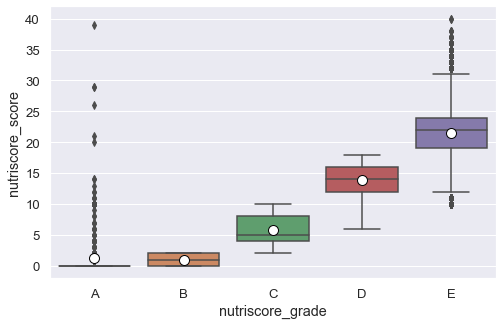

In [82]:
#Représentation des boxplot des séries nutriscore en fonction du nutriscore grade

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,5))
sns.boxplot(data=appli_score.sort_values(by = "nutriscore_grade"), x="nutriscore_grade", y="nutriscore_score",showmeans=True,
                        meanprops={"marker":"o",
                      "markerfacecolor":"white", 
                       "markeredgecolor":"black",                                   
                      "markersize":"10"},showfliers=True)

In [83]:
# TEST ANOVA POUR CATOGRY et NUTRISCORE #

#appli_categ = appli_final.loc[:,["nutriscore_score","main_category_en"]]
#appli_categ.reset_index(inplace = True)

#Représentation des boxplot des séries nutriscore en fonction du nutriscore grade

#sns.set(font_scale = 1.2)
#plt.figure(figsize=(8,5))
#sns.boxplot(data=appli_score.sort_values(by = "nutriscore_grade"), x="nutriscore_grade", y="nutriscore_score",showmeans=True,
#                        meanprops={"marker":"o",
#                      "markerfacecolor":"white", 
 #                      "markeredgecolor":"black",                                   
 #                     "markersize":"10"},showfliers=True)

- On peut constater qu'ici selon le "nutriscore_grade", la variable "nutriscore_score" a des  moyennes différentes. Ainsi, les deux variables ne semblent pas etre indépendantes. 


- **L'hypothèse nulle** : Les moyennes de deux variables "nutri_grade" et "nutri_score" ne sont pas différentes

- **Test statistique avec  l'Anova**

##### Réaliser un ANOVA demande trois conditions : 
    - I- Independence des echantillon
    - II- La distribution normale des résidus de modèle
    - III- La Homoscédasticité  (La variance des erreurs de modèle est la même.)

#### I-Independance des echantiollon
- Les données sur chaque produit sont collectées independamment. Donc, on peut considérer que les échantillons sont choisis de manière indépendante. 

In [30]:
#Modèle de régression linéaire et output de la table de résultats de l'ANOVA. 

model = ols("nutriscore_score ~ nutriscore_grade", data= appli_score).fit()
aov_table = sm.stats.anova_lm(model)

##### One_way ANOVA table 

In [31]:
# La function pour one-way ANOVA 
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
nutriscore_grade,1.925825e+07,4.0,4.814562e+06,639676.553537,0.0,0.869021,0.86902
Residual,2.902594e+06,385647.0,7.526558e+00,NaN,NaN,NaN,NaN


In [32]:
#stats.f_oneway(appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'A'],
#            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'B'],
#            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'C'],
#           appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'D'], 
#            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'E'])

###### Pour pourvoir interpréter le tableau d'ANOVA, on a besoin d'abord de  déterminer si le modèle vérifie les hypothèses de l'analyse



#### II- La distribution normale des résidus :
###### Vérifier la normalité avec "Quantile-Quantile" plot

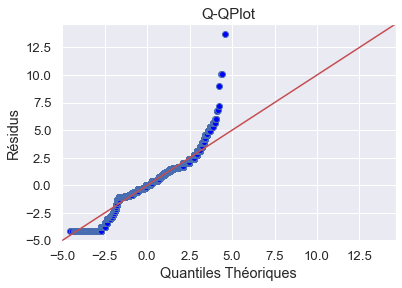

<Figure size 432x288 with 0 Axes>

In [33]:
#Diagramme Quantile-Quanatile (Q–Q plot)
sm.qqplot(model.resid_pearson, line='45')
plt.xlabel("Quantiles Théoriques")
plt.ylabel("Résidus")
plt.title("Q-QPlot", fontsize = 15)
plt.show()

plt.savefig("Q_Q_plot.png", orientation='portrait',bbox_inches='tight')    

- **On constate que les résidus s'écarte de la quantile théorique**

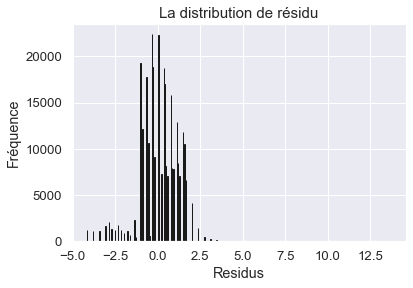

<Figure size 432x288 with 0 Axes>

In [34]:
plt.hist(model.resid_pearson, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residus")
plt.ylabel('Fréquence')
plt.title("La distribution de résidu", fontsize = 15)
plt.show()

plt.savefig('Anova_Distribution', orientation='portrait',bbox_inches='tight')    


- On observe ici la distribution des résidus. 
- Ainsi, on ne peut pas dire avec certitude que la distribution est noramle. 
- **On vérifie la normalité de résidu avec le test de "Shapiro_Wilk"**

###### Test de Shapiro_Wilk pour la normalité des résidus

In [35]:
stats.shapiro(model.resid_pearson)

ShapiroResult(statistic=0.9566910862922668, pvalue=0.0)

- Le test de Shapiro-Wilk donne une p-value < 0.05, donc on ne peut pas rejeter l'hypothèse nulle du test et les résidus ne sont pas normaux. 

- on va réaliser une transformation de données afin que le variable "nutriscore_score" suivent une distribution plus gaussienne. 

In [36]:
# Transformation des données

#Création d'un DataFrame avec les deux variables
score = appli_score.loc[:,["nutriscore_score"]]
# selection des colonnes à prendre en compte dans l'ACP
s= score.values

# Centrage et Réduction
score_scaled = MinMaxScaler().fit_transform(s)

stand_score= appli_score.copy()
stand_score['nutriscore_score'] = score_scaled
stand_score.head(3)

,nutriscore_score,nutriscore_grade
0,0.375,D
1,0.325,D
2,0.375,D


In [37]:
model2 = ols("nutriscore_score ~ nutriscore_grade", data= stand_score).fit()

aov_table2 = sm.stats.anova_lm(model2)

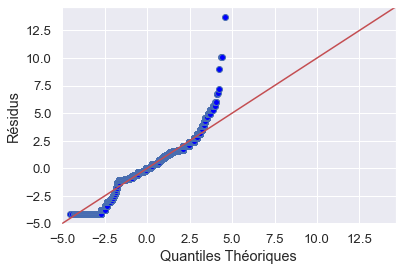

In [38]:
#Diagramme Quantile-Quantile
sm.qqplot(model2.resid_pearson, line='45')
plt.xlabel("Quantiles Théoriques")
plt.ylabel("Résidus")
plt.show()

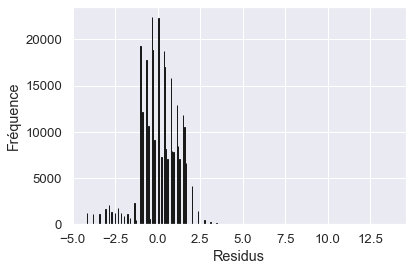

In [39]:
plt.hist(model2.resid_pearson, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residus")
plt.ylabel('Fréquence')
plt.show()

- On constate que malgré la transformation de données de 'nutriscore_score', on ne peut toujours pas affirmer avec certitude que la distribution des résidus est normaule. 

- On va utiliser donc un **test non-paramétrique : le test de Kruskal-Wallis** pour voir si la distribution de résidus est normale. 

###### Test de Kruskal-Wallis pour la normalité des résidus

In [40]:
# Créer un dictionnaire pour attribuer les valeurs numériques à la varible catégorielle de 'nutriscore_grade'
my_coding ={'A':0, 'B':1, 'C':2, 'D' : 3 , 'E': 4}

# Labéliser le variable 'nutriscore_grade' par les valeur numérique 
appli_score2 =appli_score.replace({"nutriscore_grade": my_coding})                               

In [41]:
stats.kruskal(appli_score2["nutriscore_grade"], appli_score2["nutriscore_score"])

KruskalResult(statistic=257165.57175866107, pvalue=0.0)

- Le test de Kruskal-Wallis donne une p-value de 0 et on peut avec un certain degré de confiance rejeter l'hypothèse null ( les moyennes sont égaux)  

#### III-Homoscédasticité 

- L'hypothèse finale est que les deux variables ont des variances égales. 
- Une méthode pour tester cette hypothèse est le test d'homogénéité des "variances de Levene"

###### Test de "variances de Levene"

In [42]:
stats.levene(appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'A'],
            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'B'],
            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'C'],
            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'D'], 
            appli_score['nutriscore_score'][appli_score['nutriscore_grade'] == 'E'])
                                      

LeveneResult(statistic=17058.426138232007, pvalue=0.0)

- Le test de Leven donne une p-value de 0 et on peut avec un certain degré de confiance affirmer l'uniformité de la variance de l'erreur de nos modèles

### Bilan sur le test d'ANOVA unidirectionnel 
- Les différences entre les moyennes des de deux variables "nutriscore_score" et "nutriscore_grade" sont statistiquement significatives. Ces deux variables sont corrélées.

### 2.5 - Analyse multivariée avec ACP (Analyse des composantes principales)


##### La mise en echelle de données 

In [43]:
#Choisir les variables numériques

num_var= appli_final.loc[:, appli_final.dtypes == np.number]

# selection des colonnes à prendre en compte dans l'ACP
x= num_var.values

# Centrage et Réduction
x_scaled = StandardScaler().fit_transform(x)

# Créer un dataframe avec les varibles numériques centrées
scaled_features = pd.DataFrame(x_scaled, index=num_var.index, columns=num_var.columns)


##### Réaliser l'ACP 

In [44]:
# Nombre de composente princupale 
n_comp =num_var.shape[1]-1

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pc = pca.fit_transform(x_scaled)

# Créer un dataframe des composantes principale choisies
pca_data = pd.DataFrame(data = pc
            , columns = ['pca1', 'pca2', 'pca3', 'pca4', 
                         'pca5', 'pca6'])
colonnes_pca = scaled_features.columns

In [45]:
# Les résultats de ACP 

print(" Pourcentrage de la variance expliqué par chaque axe principal : ", "\n", pca.explained_variance_ratio_*100)

print("Variance totale expliqué par les composantes principales : ", pca.explained_variance_ratio_.sum(),"\n")

print("Valeurs propres mesurent la quantité de variance expliquée par chaque axe principal :" , "\n",pca.singular_values_)

# Bruit estimé lié à la covariance
#print("Bruit estimé lié à la covariance : ",pca.noise_variance_, "\n")

 Pourcentrage de la variance expliqué par chaque axe principal :  
 [43.3821644  29.28339808 11.47016525  7.97192331  4.16345326  3.49403303]
Variance totale expliqué par les composantes principales :  0.9976513732789225 

Valeurs propres mesurent la quantité de variance expliquée par chaque axe principal : 
 [1082.18727238  889.11420662  556.45705306  463.90427002  335.25376277
  307.12156848]


### La visualisation des résultats de l'ACP 

In [46]:
# Fonction pour l'évolution de la variance expliquée en fonction du nombre de composantes 

def display_scree_plot(ACP):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie", fontsize = 10)
    plt.ylabel("La variance expliquée", fontsize = 10)
    plt.title("Eboulis des valeurs propres", fontsize = 15)
    plt.show(block=False)


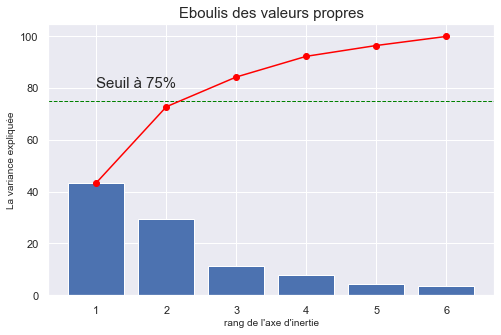

In [47]:
from matplotlib.ticker import AutoMinorLocator
sns.set(font_scale = 1)
plt.figure(figsize = (8,5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.axhline(y = 75, color = 'green', linestyle = 'dashed', linewidth = 1)
plt.text(1, 80, 'Seuil à 75%', fontsize = 15)


display_scree_plot(pca)

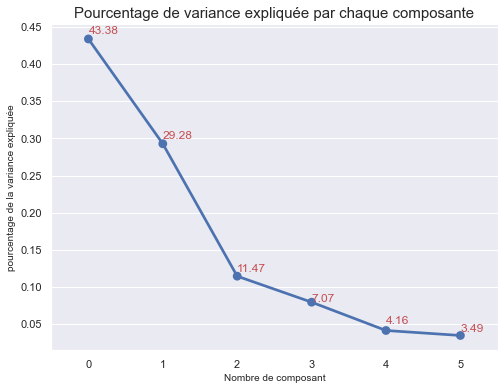

<Figure size 432x288 with 0 Axes>

In [48]:
# Scree plot
ind = np.arange(0, n_comp)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Pourcentage de variance expliquée par chaque composante', fontsize = 15)
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Nombre de composant', fontsize = 10)
ax.set_ylabel('pourcentage de la variance expliquée', fontsize = 10)

plt.text(0, 0.44, '43.38', fontsize = 12, color = 'r')
plt.text(1, 0.30, '29.28', fontsize = 12, color = 'r')
plt.text(2, 0.12, '11.47', fontsize = 12, color = 'r')
plt.text(3, 0.08, '7.07', fontsize = 12, color = 'r')
plt.text(4, 0.05, '4.16', fontsize = 12, color = 'r')
plt.text(5, 0.04, '3.49', fontsize = 12, color = 'r')
plt.show()
plt.savefig('scree', orientation='portrait',bbox_inches='tight') 

###  Bilan sur le vecteur de la variance expliquée par chaque composante 
-On constate que  que globalement la première dimension ou variable synthétique explique environ 43.4% ,la deuxième dimension explique environ 29.3% et la troisième dimension explique 11.5% de la variation.

- On constate aussi qu'avec les trois premières composentes pricipales on a une variance cumulée de plus de 80 %. On pourrait donc réduire notre jeu de données à 2 dimensions. (Deux axes pricipals)



###### La corrélation entre les variables et les composantes. (Cercle des corrélation)

            pca1      pca2
0       0.211975 -0.203545
1       2.062601  1.726361
2       1.148948 -0.117784
3      -0.720661 -1.791983
4       1.015282 -1.667631
...          ...       ...
385647  2.860866 -1.734430
385648  3.198546 -1.858405
385649  1.048454 -0.642688
385650  0.819155 -0.664519
385651  0.895577 -0.681056

[385652 rows x 2 columns]


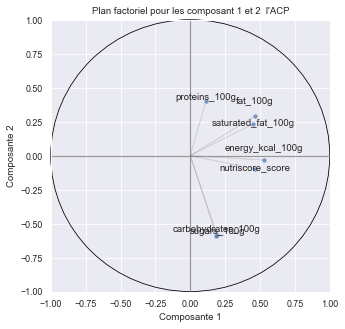

In [49]:
print(pca_data[['pca1', 'pca2']])

sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(5,5))

plt.title("Plan factoriel pour les composant 1 et 2  l'ACP")
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca,colonnes_pca ):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 
plt.savefig('cercle1', orientation='portrait',bbox_inches='tight') 

            pca3      pca4
0      -0.837508  0.556532
1       1.208825 -1.112231
2       0.355732 -0.652273
3       0.914936 -1.430935
4       0.553601 -0.496579
...          ...       ...
385647  0.031693  0.760579
385648 -0.092382  0.994218
385649  0.455406 -0.589133
385650  0.527192 -0.663623
385651  0.522605 -0.587535

[385652 rows x 2 columns]


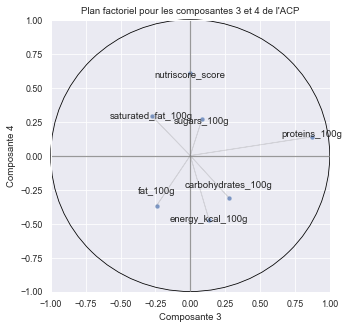

In [50]:
print(pca_data[['pca3', 'pca4']])

sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(5,5))

plt.title("Plan factoriel pour les composantes 3 et 4 de l'ACP")
plt.xlabel('Composante 3')
plt.ylabel('Composante 4')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[2,:]
y_pca = pca.components_[3,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 
plt.savefig('cercle2', orientation='portrait',bbox_inches='tight') 

            pca5      pca6
0      -0.018766  0.052081
1      -0.259456 -0.729994
2      -0.375426  0.820543
3       0.483499  0.863187
4      -0.794336  0.329286
...          ...       ...
385647  0.036942 -0.134909
385648  0.276125 -0.404790
385649 -0.719982  0.857454
385650 -0.543293  0.831506
385651 -0.621737  0.822999

[385652 rows x 2 columns]


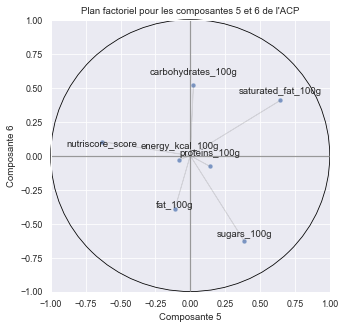

In [51]:
print(pca_data[['pca5', 'pca6']])

sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(5,5))

plt.title("Plan factoriel pour les composantes 5 et 6 de l'ACP")
plt.xlabel('Composante 5')
plt.ylabel('Composante 6')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[4,:]
y_pca = pca.components_[5,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 
plt.savefig('cercle3', orientation='portrait',bbox_inches='tight') 

### Bilan sur ACP 

-L’angle entre 2 vecteues est lié à la corrélation entre les 2 variables qu’elles représentent. Si cet angle est petit, la corrélation est forte.

- Sur la **composante 1 PCA** qui représente 43.4% de la variance expliquée, on constate que les variables "fat" et "energy" , "saturated fat" et "nutriscore" sont fortement corrélées avec la composante.
- Sur la **composante 2 PCA2** qui représente 29.3% de la variance expliquée, on constate que le variables "protéin"  est corrélées positivement. 
- En revanche, les deux variables "suger" et "carbohydrate" qui sont corrélées entre eux, sont anticoréeléé au "pca2"

- Sur la **composante 3 PCA** qui représente 11.5% de la variance expliquée, on constate que le variable **"proteins"** est correlées positivement. Elle est de plus, assez proche du cercle des corrélations et donc très bien représentées.

- Sur la **composante 4 PCA** qui représente 8% de la variance expliquée, on constate que le variable "nutriscore_score" est correlée positivement. Elle est de plus, assez proche du cercle des corrélations et donc très bien représentée. Les variables "fat", "energy" et "carbohydrate" sont  corréle négativement. 

- Sur la **composante 5 PCA5**  qui représente 4.2% de la variance expliquée, on constate que les variable "sugar" et "saturated fat" sont correlées positivement. Elles sont de plus, assez proche du cercle des corrélations et donc très bien représentées.

- Les variables "energy" et "nutriscore" , fortement corrélées entre eux , sont anti-corrélées aux 5eme composantes

- Sur la **composante 6 PC6** qui représente 3.5% de la variance expliquée, on constate que les variable "carbohydrate" et "saturated_fat sont correlée positivement. Les variable "fat" , "sugar" et "proteins"  sont corrélées négativement au sixième axe pricipal.
- On a constaté également dans la première graphique de cercle des corrélation qur les variables "sugar"/"carbohydrate" et "fat/saturated fat" sont fortement liées. On pourrait donc sélectionner l'un pour l'implementation de l'application. Pour cela on va choisir la variable avec la standard déviation la plus élevée. (Plus dispersée) 

##### Le coefficients de la combinaison linéaire des variables pour chaque composante

In [52]:
pca_analyse_df = pd.DataFrame(pca.components_)
pca_analyse_df.columns = colonnes_pca
pca_analyse_df = pca_analyse_df.T
pca_analyse_df.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6']
pca_analyse_df

,pca1,pca2,pca3,pca4,pca5,pca6
proteins_100g,0.111920,0.401665,0.873699,0.138387,0.141402,-0.079583
fat_100g,0.464957,0.291972,-0.241157,-0.367924,-0.109895,-0.391111
sugars_100g,0.193767,-0.584886,0.083449,0.265912,0.385989,-0.627413
energy_kcal_100g,0.527969,-0.032838,0.135741,-0.476787,-0.077238,-0.029770
carbohydrates_100g,0.186858,-0.588425,0.276438,-0.309691,0.022651,0.520746
nutriscore_score,0.465504,-0.097471,-0.000563,0.604689,-0.630472,0.102856
saturated_fat_100g,0.450980,0.233459,-0.276922,0.293067,0.644180,0.405476


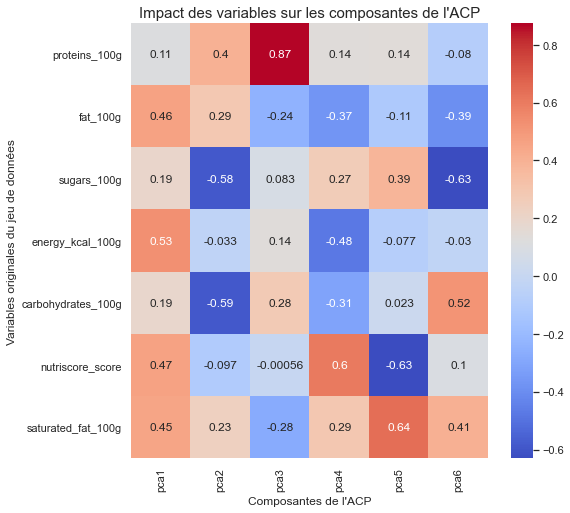

In [53]:
#corrélation entre les variables et les principale composantes 
sns.set(font_scale=1)
plt.figure(figsize=(8,8))
sns.heatmap(pca_analyse_df, cmap='coolwarm', annot= True)
plt.title('Impact des variables sur les composantes de l\'ACP', size = 15)
plt.ylabel('Variables originales du jeu de données')
plt.xlabel('Composantes de l\'ACP')
plt.xticks(rotation= 90)

sns.set(font_scale=1)
plt.savefig('feauture_axes', orientation='portrait',bbox_inches='tight') 

#### Bilan sur  le coefficients de la combinaison linéaire des variables pour chaque composante
- Les deux variables 'nutriscore' et 'protéins' sont les mieux représentées respectivement par les composantes 3 et 4, alors que les trois variables "sugars", "carbohydrate" et "energy" sont anti_correléé au composant 2


##  3 - Implementation de l'application Keto_score

- Dans un régime cétogène la consommation des alimentations se caractérise :

        -Glucide : 5% des calories totales journalière;
   
       -Lipide :  75% des calories total journalières;
   
       -Protéine :  20% des calories total journalières;

- Basé sur cette formule nous allons d'abord créer un keto score ente 1 et 10.
- Nous allons ensuite faire un classement des score avec un echelle de likert avec 5 point : 

        - score 8 à 10:"Excellent"
        - score 6 à 8 : "Very good"
        - score 4 à 6 : "Good"
        - score 2 à 4 : "Poor"
        - score 0 à 2 : "Very Poor"
        

In [54]:
appli_final.head(5)

,product_name,nutriscore_grade,proteins_100g,fat_100g,sugars_100g,energy_kcal_100g,code,countries_en,carbohydrates_100g,nutriscore_score,main_category_en,brands,saturated_fat_100g
0,VEGAN ALMOND ICE CREAM 3 X,D,2.000000,16.0,19.00,248.000000,8714100658499,"AUSTRALIA,FRANCE,GERMANY,SPAIN,UNITED KINGDOM",23.000000,15.0,ICE CREAMS,MAGNUM,9.80
1,CRUNCHY PEANUT BUTTER,D,25.000000,50.0,6.25,593.750000,11110791559,UNITED STATES,21.880000,13.0,PEANUT BUTTERS,SIMPLE TRUTH ORGANIC,7.81
2,CHEESE TOMATO & BASIL,D,10.000000,22.0,5.00,474.000000,7300400127387,"FRANCE,GERMANY,POLAND,SWITZERLAND",56.500000,15.0,CRISPBREADS,"WASA,WASA SANDWICH",8.50
3,HONEY RINGS,B,6.666667,0.0,20.00,366.666667,808912018614,CANADA,86.666667,2.0,CEREALS WITH HONEY,FARM BOY,0.00
4,PEPPERKAKER,D,5.800000,14.7,26.40,480.000000,7037421091075,"FRANCE,NORWAY",72.900000,18.0,GINGERBREADS,"BJØRKEN,BAXT",1.20


In [55]:
appli_final.describe()

,proteins_100g,fat_100g,sugars_100g,energy_kcal_100g,carbohydrates_100g,nutriscore_score,saturated_fat_100g
count,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000
mean,8.409117,15.907693,15.087733,292.731796,29.245101,11.418190,6.127743
std,8.872043,17.107706,19.712660,182.048066,27.528872,7.580466,8.117164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900000,1.990000,0.900000,134.000000,4.170000,4.000000,0.300000
50%,6.000000,11.000000,5.000000,284.000000,18.750000,12.000000,2.900000
75%,11.900000,25.000000,24.140000,429.000000,53.600000,17.000000,9.000000
max,100.000000,100.000000,100.000000,846.000000,100.000000,40.000000,100.000000


- On a vu dans le chapitre précedent de l'analyse de composentes pricipale qu'entre les couple des variables "sugar"/"carbohydrat" et "fat/saturated_fat" on peut choisir un seul variable. 
- On choisi le variable qui a l'ecart type" le plus élevée
- Ainsi les trois variables de nutriments pour créer un keto_score sont : 
     - Protéine, fat_100g, Carbohydrate 100g 
  

In [56]:
# Trier les variables fianle pour tester l'idée de l'application 
df_ketoscore= appli_final[["code", "product_name","proteins_100g", "fat_100g","main_category_en",
                           "carbohydrates_100g", "nutriscore_grade","energy_kcal_100g", 'nutriscore_score']]
df_ketoscore.reset_index(drop=True, inplace=True) 

### 3.1 - Création de keto_score pour chaque produit

In [57]:
# Créer un colonne de "keto" avec la formule en_dessus
df_ketoscore["keto"] = (df_ketoscore["proteins_100g"]*0.2) + (df_ketoscore['fat_100g']*0.75)\
                                              + (df_ketoscore['carbohydrates_100g']*0.05)                               

# La mise en echell de keto_score créer avec min/max méthode 
df_ketoscore['keto_score'] = (df_ketoscore['keto']- df_ketoscore['keto'].min()) / (df_ketoscore['keto'].max()-df_ketoscore['keto'].min()) 
                                                    

df_ketoscore['keto_score'] = (df_ketoscore['keto_score']*10).round(decimals = 2)

In [58]:
df_ketoscore['keto_score'].describe()

count    385652.000000
mean          1.507536
std           1.316513
min           0.000000
25%           0.460000
50%           1.180000
75%           2.260000
max          10.000000
Name: keto_score, dtype: float64

##### La distribution de keto_score dans le jeu de données 

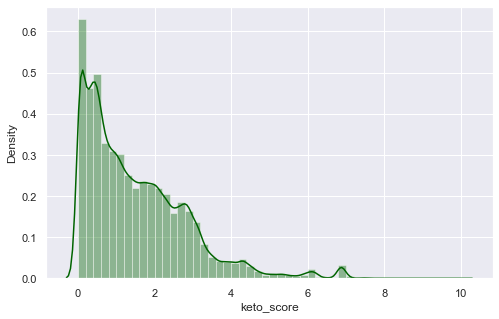

In [59]:
plt.figure(figsize=(8,5))
sns.set(font_scale =1)
sns.distplot(df_ketoscore["keto_score"], color = 'darkgreen')


plt.savefig('distrubution_ketoscore', orientation='portrait',bbox_inches='tight')    

In [60]:
print("Skewness :", df_ketoscore['keto_score'].skew().round(decimals = 2))
print("Kurtosis :", df_ketoscore['keto_score'].kurt().round(decimals = 2))
print("Médiane :",df_ketoscore['keto_score'].median())
print("Moyenne :", df_ketoscore['keto_score'].mean())
print("Mode :", df_ketoscore['keto_score'].mode())
print("Ecart_type :", df_ketoscore['keto_score'].std())

Skewness : 1.32
Kurtosis : 2.16
Médiane : 1.18
Moyenne : 1.5075361465779664
Mode : 0    0.06
dtype: float64
Ecart_type : 1.3165125161385234


<AxesSubplot:xlabel='keto_score'>

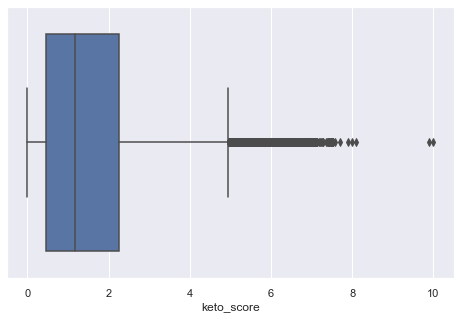

In [61]:
plt.figure(figsize=(8,5))
sns.set(font_scale =1)
sns.boxplot(df_ketoscore["keto_score"])

### 3.2 - Création de keto_grade avec le ["5-point likert scale"](https://fr.wikipedia.org/wiki/%C3%89chelle_de_Likert) 

In [62]:
ketscore_map = [df_ketoscore["keto_score"].between(0, 2, inclusive= True), df_ketoscore["keto_score"].between(2.01, 4), 
            df_ketoscore["keto_score"].between(4.01, 6), df_ketoscore["keto_score"].between(6.01, 8),
                df_ketoscore["keto_score"].between(8.01, 10, inclusive= True)]

keto_grade_values = ['poor', 'very poor', 'good', 'very good', 'excellent'] 
df_ketoscore["keto_grade"] = np.select(ketscore_map, keto_grade_values, default = 0)
df_ketoscore["keto_grade"].value_counts()

poor         268139
very poor     98557
good          13840
very good      5113
excellent         3
Name: keto_grade, dtype: int64

In [63]:
df_ketoscore.head(3)

,code,product_name,proteins_100g,fat_100g,main_category_en,carbohydrates_100g,nutriscore_grade,energy_kcal_100g,nutriscore_score,keto,keto_score,keto_grade
0,8714100658499,VEGAN ALMOND ICE CREAM 3 X,2.0,16.0,ICE CREAMS,23.00,D,248.00,15.0,13.550,1.36,poor
1,11110791559,CRUNCHY PEANUT BUTTER,25.0,50.0,PEANUT BUTTERS,21.88,D,593.75,13.0,43.594,4.36,good
2,7300400127387,CHEESE TOMATO & BASIL,10.0,22.0,CRISPBREADS,56.50,D,474.00,15.0,21.325,2.13,very poor


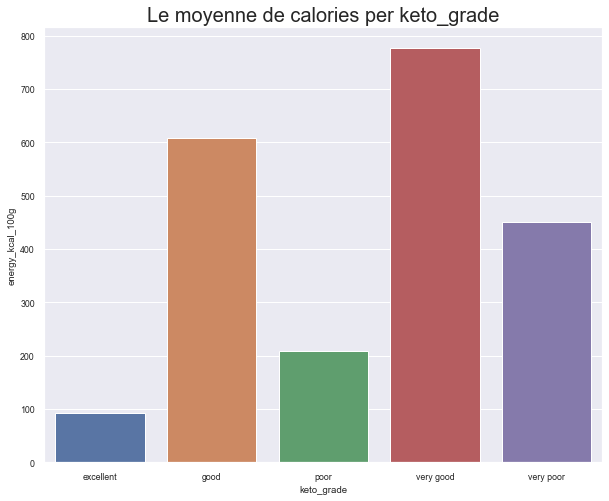

In [64]:
# Visualiser le moyen de keto_score pour chaque classement de keto 
mean_keto = pd.DataFrame(df_ketoscore.groupby('keto_grade')['energy_kcal_100g'].mean()).reset_index()


sns.set(font_scale = 0.8)
plt.figure(figsize=(10,8))
sns.barplot(data = mean_keto, x= mean_keto['keto_grade'], y = mean_keto['energy_kcal_100g'])

plt.title("Le moyenne de calories per keto_grade", fontsize=20)
plt.savefig('energy_ketograde.png', orientation='portrait',bbox_inches='tight')    

- **On constate que les produits avec un keto_grade de "excellent" ne sont pas necessairement des produits caloriques**


Text(0.5, 1.0, 'Nutriscore vs keto_grade')

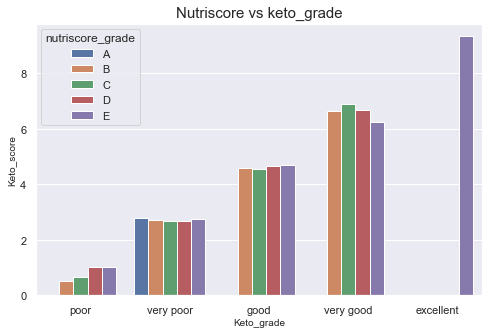

In [65]:
keto_nutriscore = pd.DataFrame(df_ketoscore.groupby(['nutriscore_grade', 'keto_grade'])['keto_score'].mean()).reset_index()

keto_nutriscore.head()


sns.set(font_scale = 1)
plt.figure(figsize=(8,5))
sns.barplot(data = keto_nutriscore,
            x= keto_nutriscore['keto_grade'], y = keto_nutriscore['keto_score'], hue = 'nutriscore_grade' )
plt.ylabel('Keto_score', fontsize=10)
plt.xlabel('Keto_grade', fontsize=10)
plt.title("Nutriscore vs keto_grade", fontsize=15)

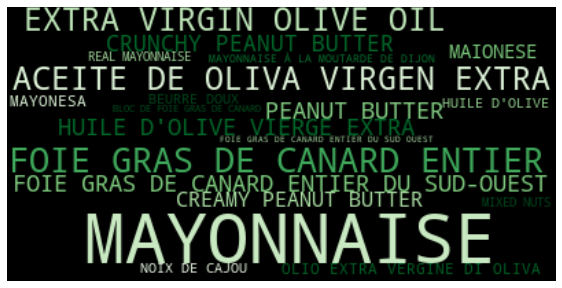

In [66]:
good_keto = df_ketoscore[df_ketoscore['keto_grade'].str.contains('good')]
good = good_keto['product_name'].value_counts().to_dict()

wc_good = WordCloud(max_words=20, background_color="black",
                    max_font_size = 50, colormap="Greens", 
                    collocations=False).generate_from_frequencies(good)
plt.figure(figsize = (8, 5)) 
plt.imshow(wc_good,interpolation="bilinear")
plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()
wc_good.to_file("good_keto.png")

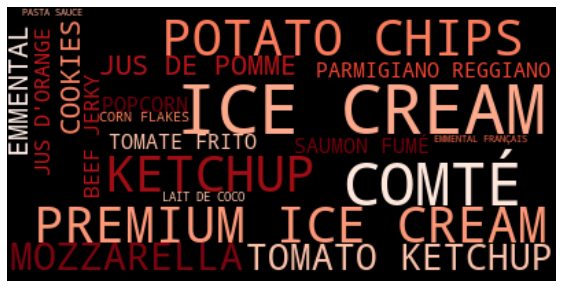

In [67]:
poor_keto= df_ketoscore[df_ketoscore['keto_grade'].str.contains('poor')]
poor =poor_keto['product_name'].value_counts().to_dict()

wc_poor = WordCloud(max_words=20, background_color="black", 
                    max_font_size = 50, colormap="Reds",
                   collocations=False).generate_from_frequencies(poor)
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(wc_poor,interpolation="bilinear")
plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()
wc_poor.to_file("poor_keto.png")

###### Le classement de keto_grade pour les six categorie de produit 

In [68]:
# Créer un dataframe pour la category 'cheeses'

cookie = df_ketoscore[df_ketoscore['main_category_en'].str.contains("BISCUI")]
cookie_keto_mean = pd.DataFrame(cookie.groupby('keto_grade')['keto_score'].mean()).reset_index()
cookie_keto_mean.columns = ["keto_grade", "biscuit"]


# poisson 
poissons = df_ketoscore[df_ketoscore['main_category_en'].str.contains("FISH")]
poisson_keto_mean = pd.DataFrame(poissons.groupby('keto_grade')['keto_score'].mean()).reset_index()
poisson_keto_mean.columns = ["keto_grade", "poissons"]

# viande 
viande = df_ketoscore[df_ketoscore['main_category_en'].str.contains("MEAT|VIANDE|HAM")]
viande_keto_mean = pd.DataFrame(viande.groupby('keto_grade')['keto_score'].mean()).reset_index()
viande_keto_mean.columns = ["keto_grade", "viande"]

# huiles 
huiles= df_ketoscore[df_ketoscore['main_category_en'].str.contains("OIL")]
huiles_keto_mean = pd.DataFrame(huiles.groupby('keto_grade')['keto_score'].mean()).reset_index()
huiles_keto_mean.columns = ["keto_grade", "huiles"] 


# pizza 
pizza= df_ketoscore[df_ketoscore['main_category_en'].str.contains("PIZ")]
pizza_keto_mean = pd.DataFrame(pizza.groupby('keto_grade')['keto_score'].mean()).reset_index()
pizza_keto_mean.columns = ["keto_grade", "pizza"]


# Thonnes
thonnes = df_ketoscore[df_ketoscore['main_category_en'].str.contains("TUNA")]
thonnes_keto_mean = pd.DataFrame(thonnes.groupby('keto_grade')['keto_score'].mean()).reset_index()
thonnes_keto_mean.columns = ["keto_grade", "thonnes"]

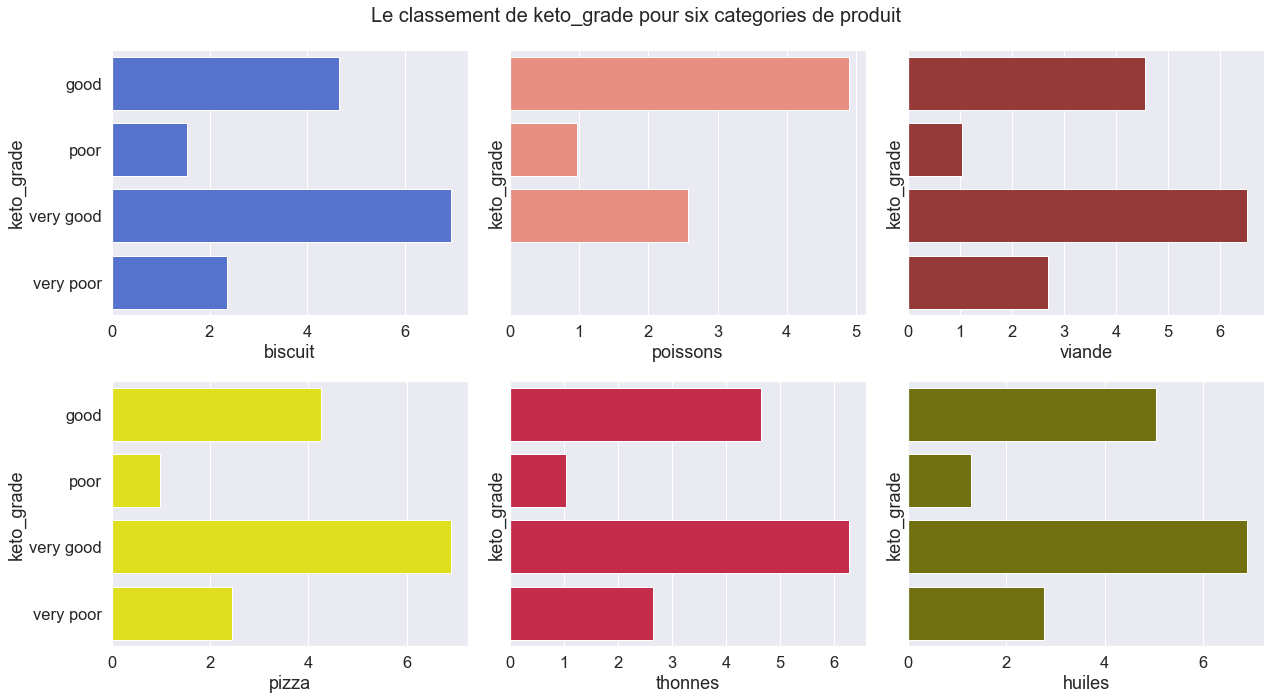

In [69]:
sns.set(font_scale = 1.5)


fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

fig.suptitle("Le classement de keto_grade pour six categories de produit", fontsize = 20)


sns.barplot(ax=axes[0, 0], data=cookie_keto_mean, y='keto_grade', x='biscuit', color = 'royalblue')
sns.barplot(ax=axes[0, 1], data=poisson_keto_mean, y='keto_grade', x='poissons', color = 'salmon')
sns.barplot(ax=axes[0, 2], data=viande_keto_mean, y='keto_grade', x='viande', color= 'brown')
sns.barplot(ax=axes[1, 0], data=pizza_keto_mean, y='keto_grade', x='pizza', color = 'yellow')
sns.barplot(ax=axes[1, 1], data=thonnes_keto_mean, y='keto_grade', x='thonnes', color = 'crimson')
sns.barplot(ax=axes[1, 2], data=huiles_keto_mean, y='keto_grade', x='huiles', color= 'olive')
plt.tight_layout()
plt.savefig('keto_grade_category.png')    

In [70]:
print('le moyenne de keto_score pour les poissons : ', poissons['keto_score'].mean(), "\n")
print('le moyenne de keto_score pour les viands: ', viande['keto_score'].mean(), "\n")
print('le moyenne de keto_score pour les huile : ', huiles['keto_score'].mean(), "\n")
print('le moyenne de keto_score pour les pizza : ', pizza['keto_score'].mean(), "\n")
print('le moyenne de keto_score pour les thonnes : ', thonnes['keto_score'].mean(), "\n")
print('le moyenne de keto_score pour les biscuit : ', cookie['keto_score'].mean(), "\n")


le moyenne de keto_score pour les poissons :  1.125067079463366 

le moyenne de keto_score pour les viands:  1.2894351247031086 

le moyenne de keto_score pour les huile :  4.176221009549828 

le moyenne de keto_score pour les pizza :  0.9996129503407973 

le moyenne de keto_score pour les thonnes :  1.298751233958541 

le moyenne de keto_score pour les biscuit :  1.9014004198550847 



### 4.3 - Création de la fonction pour calculer  le keto_grade de produits à partir de son bar_code

- **L'entrée de la fonction "my_appli_keto" est le code de produit.**
- **Sa sorties est la valeur de protéin, lipide, carbohydrates et calorie pour 100 g, ainsi que son classement nutritionnel (nutri_grade) et cétogénique (keto_grade).**
- **La fonction visualise aussi un donut chart de rapport de trois nutriment en 100g.**

In [71]:
# Function de l'application keto_score
def keto_calcul (i) : 
    df_test = df_ketoscore[df_ketoscore['code']== i][['product_name','proteins_100g',
                                                      'fat_100g','carbohydrates_100g',
                                                      'energy_kcal_100g','keto_grade', 
                                                      'nutriscore_grade']].squeeze()
    print(df_test)
    return(df_test[['proteins_100g','fat_100g','carbohydrates_100g']].squeeze().plot.pie(autopct='%1.1f%%'))


##### Tester la fonction "my_appli_keto" sur les bar codes de produits de jeu de données

product_name          FLORENTINS SANS GLUTEN
proteins_100g                            8.9
fat_100g                                49.1
carbohydrates_100g                      30.0
energy_kcal_100g                       617.0
keto_grade                              good
nutriscore_grade                           C
Name: 328725, dtype: object


<AxesSubplot:ylabel='328725'>

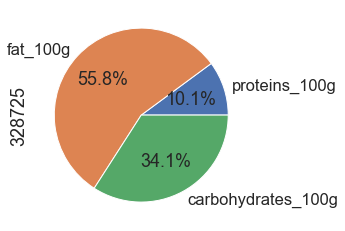

In [72]:
keto_calcul('4015537420401')  

product_name          PISTACHIOS
proteins_100g               20.0
fat_100g                    46.7
carbohydrates_100g          30.0
energy_kcal_100g           633.0
keto_grade                  good
nutriscore_grade               C
Name: 385530, dtype: object


<AxesSubplot:ylabel='385530'>

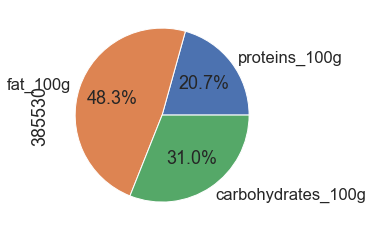

In [73]:
keto_calcul('29212100100')

product_name          CARAMEL & SEA SALT ITALIAN GELATO
proteins_100g                                       2.0
fat_100g                                            8.0
carbohydrates_100g                                 31.0
energy_kcal_100g                                  200.0
keto_grade                                         poor
nutriscore_grade                                      D
Name: 17, dtype: object


<AxesSubplot:ylabel='17'>

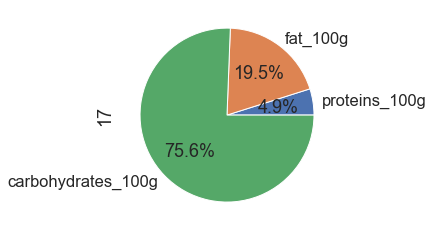

In [74]:
keto_calcul('0099482480219')

## 4. Conclusion

**- Il est possible de réaliser une application qui aide les consommateurs qui souhaite suivre un régime cétogène.** 
**- Cela sous deux conditions** 
  -  Les valuer de protéine, lipide et carbohydrate en 100 grde l'aliment soient fournie
  -  Le produit est déjà présent avec ses variables remplies sur la base Open Food Fact
